In [1]:
import tensorflow as tf

In [2]:
# 导入数据集

In [27]:
(x,y),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
# 数据预处理

In [5]:
x = tf.convert_to_tensor(x,dtype=tf.float32)/255 # 关于图像的rgb范围缩放到0~1之间

In [6]:
y = tf.convert_to_tensor(y,dtype = tf.int32)

In [7]:
x_test = tf.convert_to_tensor(x_test,dtype=tf.float32)/255
y_test = tf.convert_to_tensor(y_test,dtype=tf.int32)

In [8]:
train_db = tf.data.Dataset.from_tensor_slices((x,y)).batch(128)

In [9]:
train_iter = iter(train_db)

In [10]:
test_db = tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(128) # 测试数据

In [11]:
sample = next(train_iter)

In [12]:
# 设置参数

In [13]:
# 维度变换为【b,28*28】=>[b,256] =>[b,128] =>[b,10] # 这是是分十类，所以最后是十

In [14]:
W1 = tf.Variable(tf.random.truncated_normal([784,256],stddev=0.1))
b1 = tf.Variable(tf.zeros([256]))
W2 = tf.Variable(tf.random.truncated_normal([256,128],stddev=0.1))
b2 = tf.Variable(tf.zeros([128]))
W3 = tf.Variable(tf.random.truncated_normal([128,10],stddev=0.1))
b3 = tf.Variable(tf.zeros([10]))
a = 1e-3

In [15]:
# 设置求导监测

In [17]:
for echop in range(100):
    for step,(x,y) in enumerate(train_db):
        # 维度变换 输入的是【128，28，28】 =>【128，28*28】
        x = tf.reshape(x,[-1,28*28])
        # 检测求导
        with tf.GradientTape() as tape:
            tape.watch([W1,b1,W2,b2,W3,b3])
            h1 = tf.nn.relu(x@W1+b1)
            h2 = tf.nn.relu(h1@W2+b2)
            out = h2@W3+b3

            #实际值预处理
            y_hot = tf.one_hot(y,depth=10)
            # 设置损失函数
            loss = tf.reduce_mean(tf.square(y_hot-out))
        # 得到梯度
        grads = tape.gradient(loss,[W1,b1,W2,b2,W3,b3])

        # 参数更新
        W1.assign_sub(a*grads[0])
        b1.assign_sub(a*grads[1])
        W2.assign_sub(a*grads[2])
        b2.assign_sub(a*grads[3])
        W3.assign_sub(a*grads[4])
        b3.assign_sub(a*grads[5])

#         打印数据
#         if step%100 == 0:
#             print(step,"loss:",loss)  
    # 测试
    correct_num,total_num = 0,0
    for (x,y) in test_db:
        x = tf.reshape(x,[-1,28*28])
        h1 = tf.nn.relu(x@W1+b1)
        h2 = tf.nn.relu(h1@W2+b2)
        out = h2@W3+b3
            
        prob = tf.nn.softmax(out,axis=1)
        pred = tf.argmax(prob,axis=1)
        pred = tf.cast(pred,dtype=tf.int32)
            
        correct = tf.cast(tf.equal(pred,y),dtype=tf.int32)
        correct = tf.reduce_sum(correct)
        correct_num += int(correct)
        total_num += x.shape[0]
            
    acc = correct_num/total_num
    print("第",echop+1,"轮test,acc:",acc)


第 1 轮test,acc: 0.5349
第 2 轮test,acc: 0.5545
第 3 轮test,acc: 0.5689
第 4 轮test,acc: 0.5821
第 5 轮test,acc: 0.5944
第 6 轮test,acc: 0.6053
第 7 轮test,acc: 0.6157
第 8 轮test,acc: 0.6269
第 9 轮test,acc: 0.637
第 10 轮test,acc: 0.645
第 11 轮test,acc: 0.6527
第 12 轮test,acc: 0.6599
第 13 轮test,acc: 0.6662
第 14 轮test,acc: 0.672
第 15 轮test,acc: 0.6786
第 16 轮test,acc: 0.6848
第 17 轮test,acc: 0.6903
第 18 轮test,acc: 0.6959
第 19 轮test,acc: 0.7009
第 20 轮test,acc: 0.7058
第 21 轮test,acc: 0.7114
第 22 轮test,acc: 0.7152
第 23 轮test,acc: 0.7194
第 24 轮test,acc: 0.7234
第 25 轮test,acc: 0.7279
第 26 轮test,acc: 0.7315
第 27 轮test,acc: 0.7349
第 28 轮test,acc: 0.7377
第 29 轮test,acc: 0.7405
第 30 轮test,acc: 0.7433
第 31 轮test,acc: 0.7458
第 32 轮test,acc: 0.7481
第 33 轮test,acc: 0.7509
第 34 轮test,acc: 0.7534
第 35 轮test,acc: 0.7566
第 36 轮test,acc: 0.7594
第 37 轮test,acc: 0.7628
第 38 轮test,acc: 0.7659
第 39 轮test,acc: 0.7682
第 40 轮test,acc: 0.7704
第 41 轮test,acc: 0.7721
第 42 轮test,acc: 0.7752
第 43 轮test,acc: 0.778
第 44 轮test,acc: 0.7801
第

In [25]:
import matplotlib.pyplot as plt
import numpy as np

In [31]:
x.shape

(60000, 28, 28)

In [32]:
y[2]

4

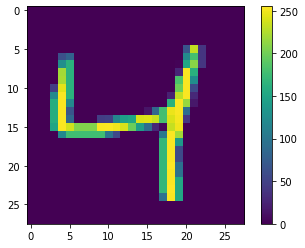

In [30]:
plt.figure()
plt.imshow(x[2])
plt.colorbar()
plt.grid(False)
plt.show()